In [1]:
!nvidia-smi

Thu Nov 16 06:37:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working/datasets


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20 --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5173.4/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

### CLI Syntax

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="6Bu3mYxlviDGLeoPMrjJ")
project = rf.workspace("university-a4j9h").project("pedestrians-detection-vatow")
dataset = project.version(1).download("yolov8")

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.0 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
pytoolconfig 1.2.6 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
tensorflowjs 4.13.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.


A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Pedestrians-Detection-1 in yolov8:: 100%|██████████| 6816/6816 [00:00<00:00, 6838.03it/s]


## Custom Training

In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 plots=True



/kaggle/working/datasets
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/Pedestrians-Detection-1/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [ ]:
!yolo task=detect mode = train model=runs/detect/train2/weights/last.pt data = {dataset.location}/data.yaml epochs=100 plots= True

In [28]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1.jpg
events.out.tfevents.1700118200.592c859fa48e.282.0  train_batch2.jpg
train_batch0.jpg				   weights


/kaggle/working/datasets


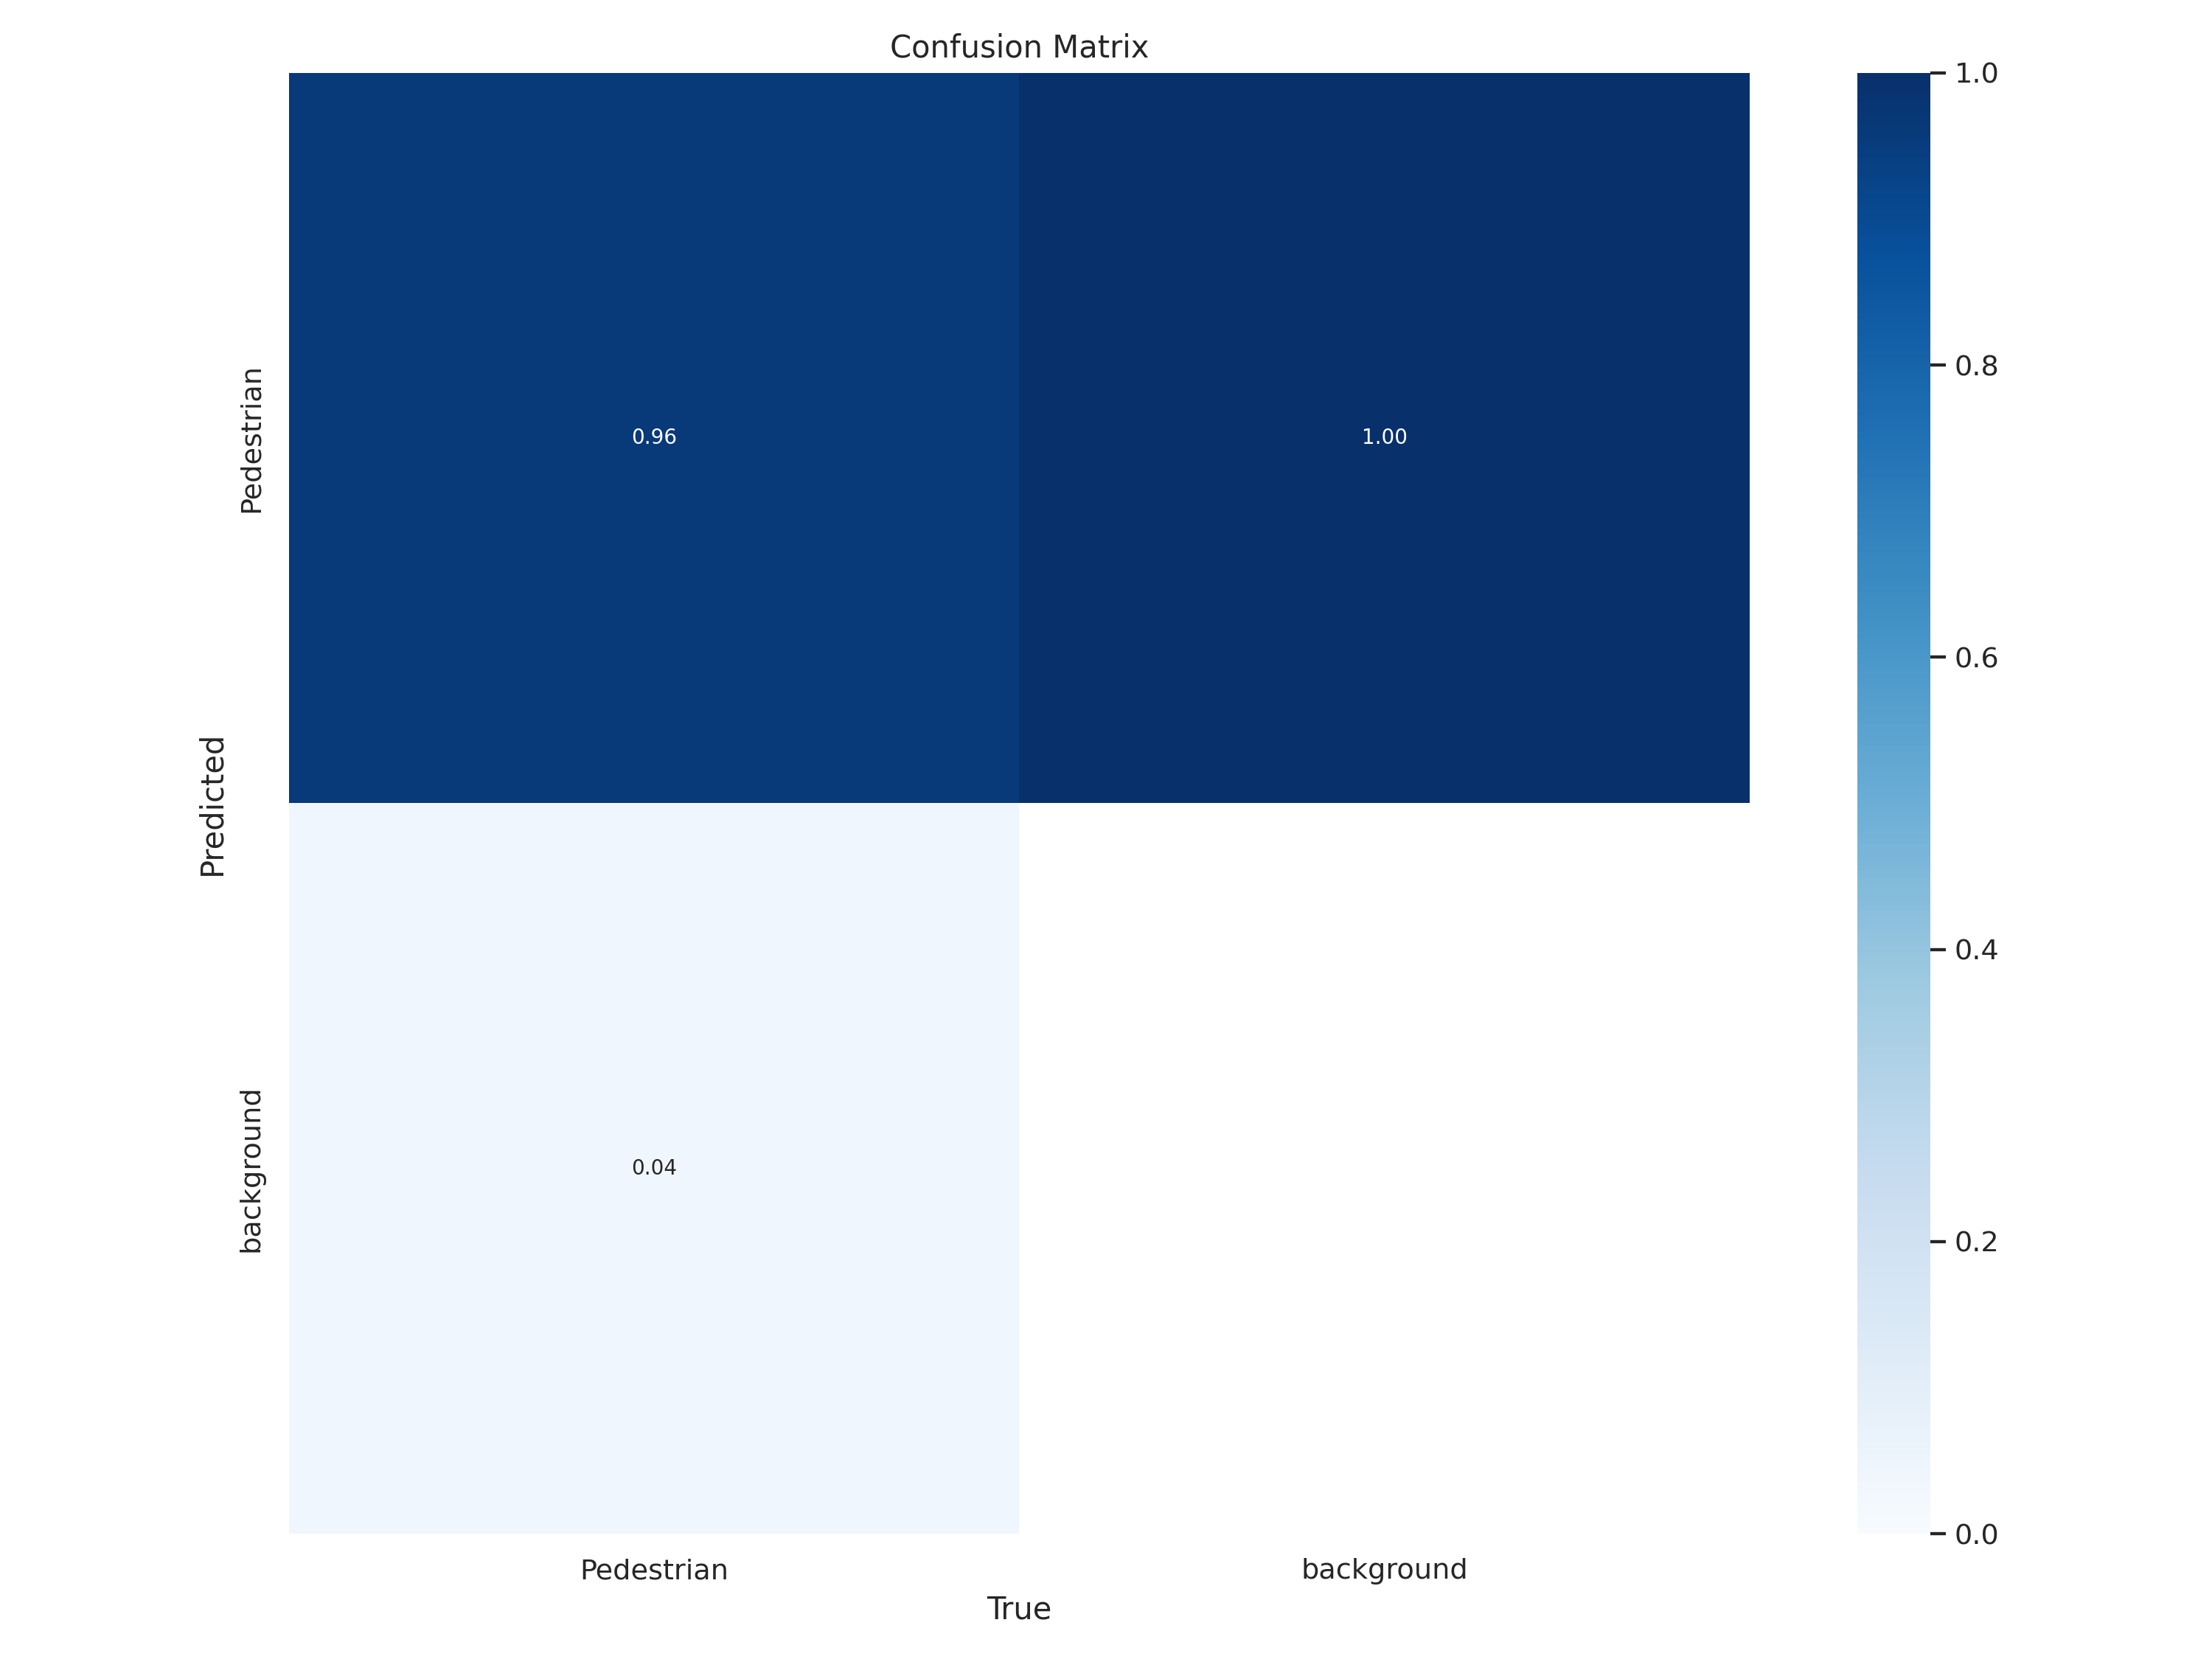

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/kaggle/working/datasets


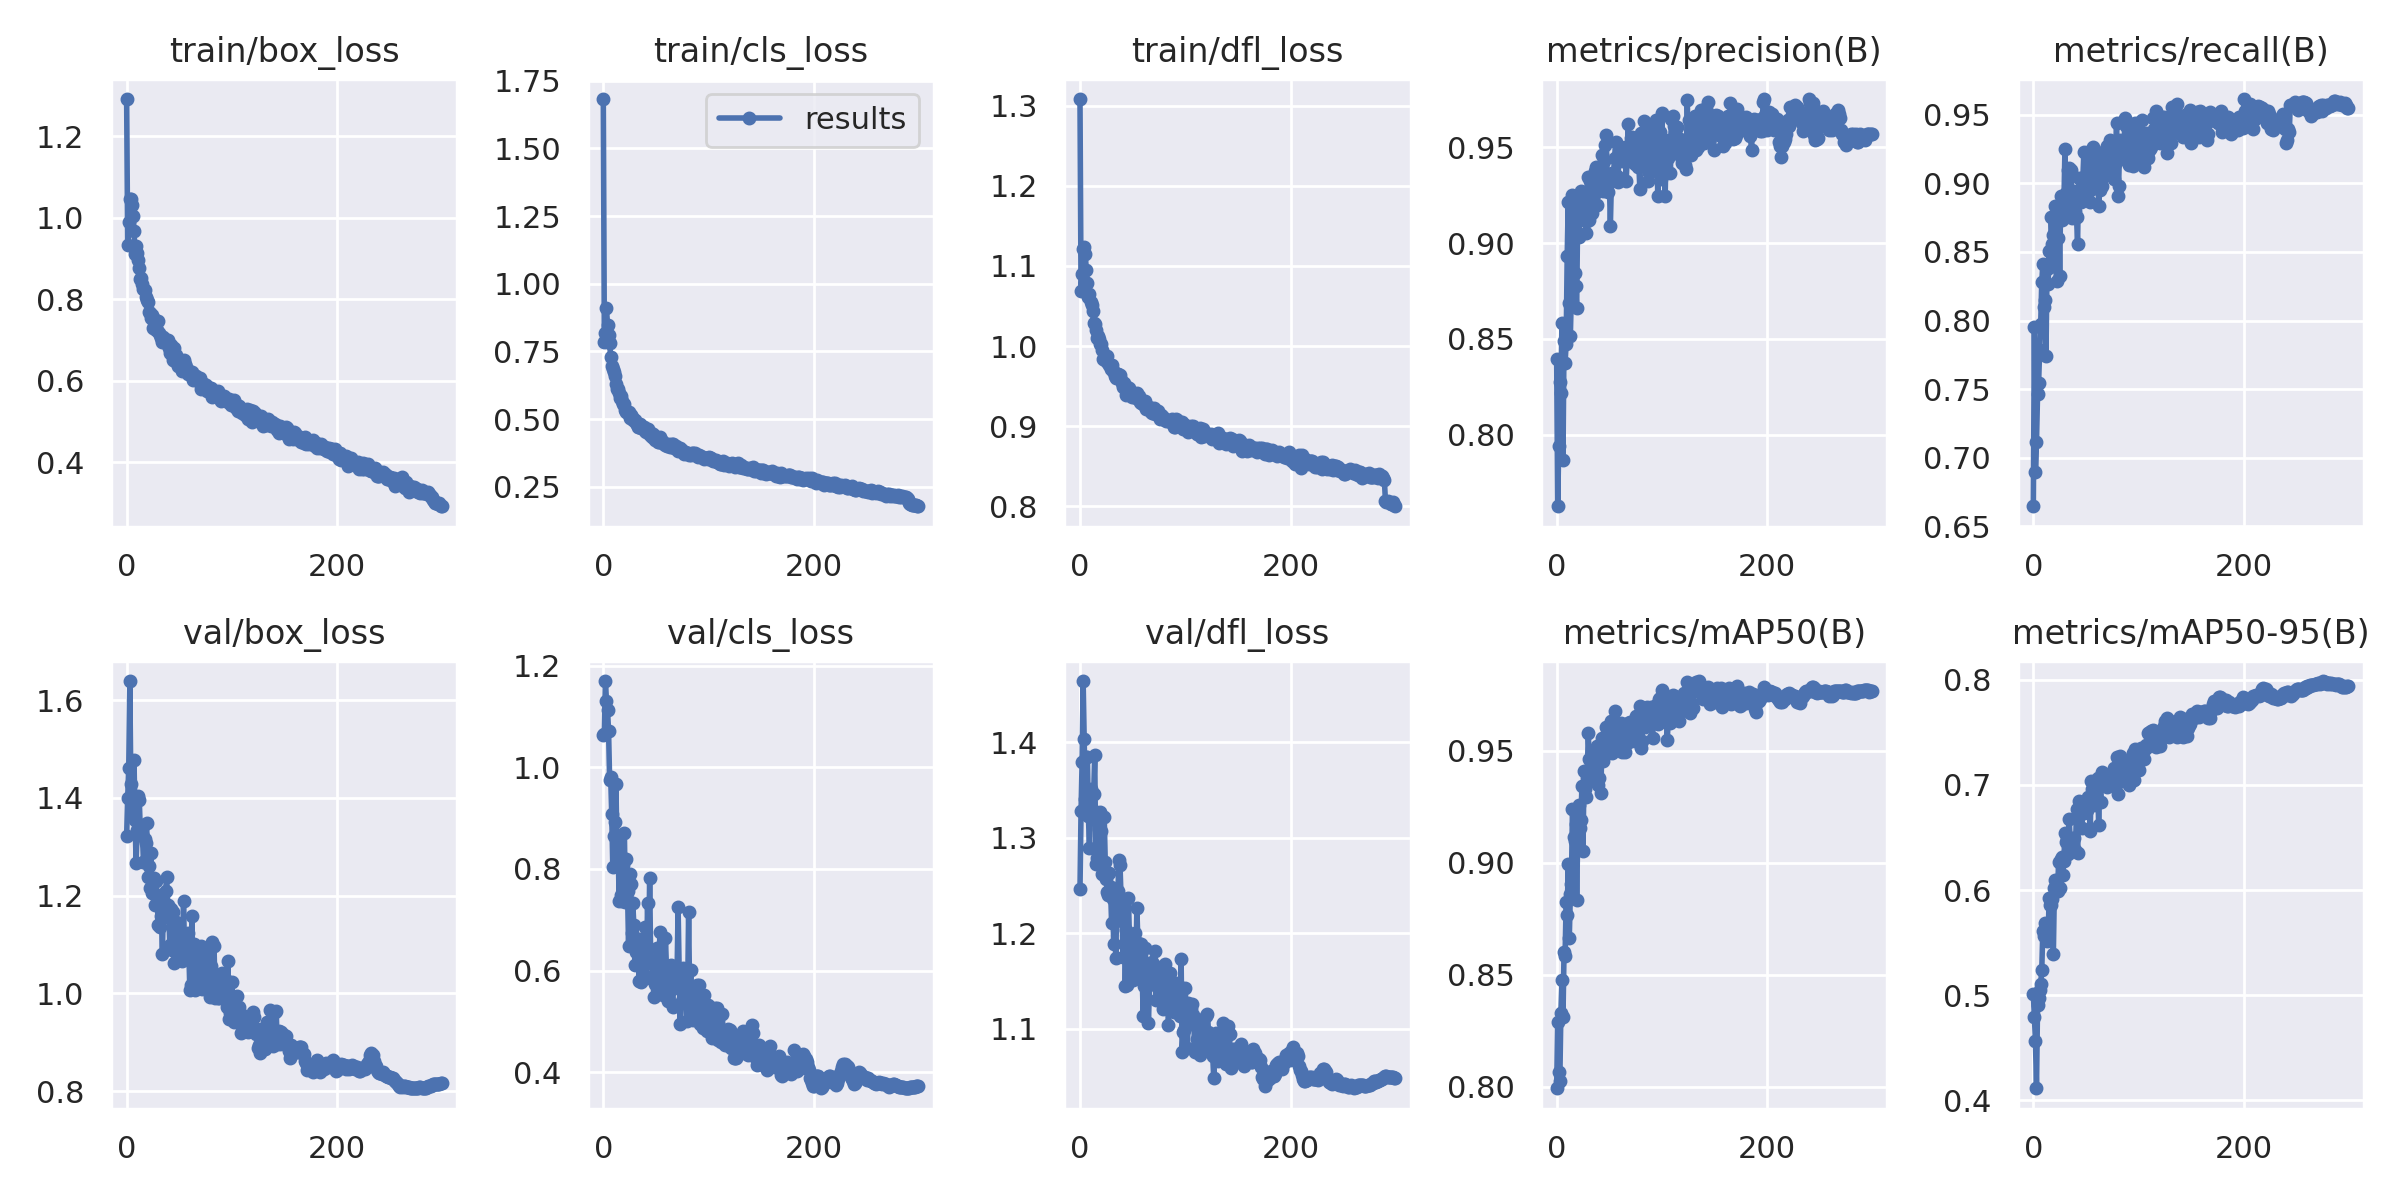

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/kaggle/working/datasets


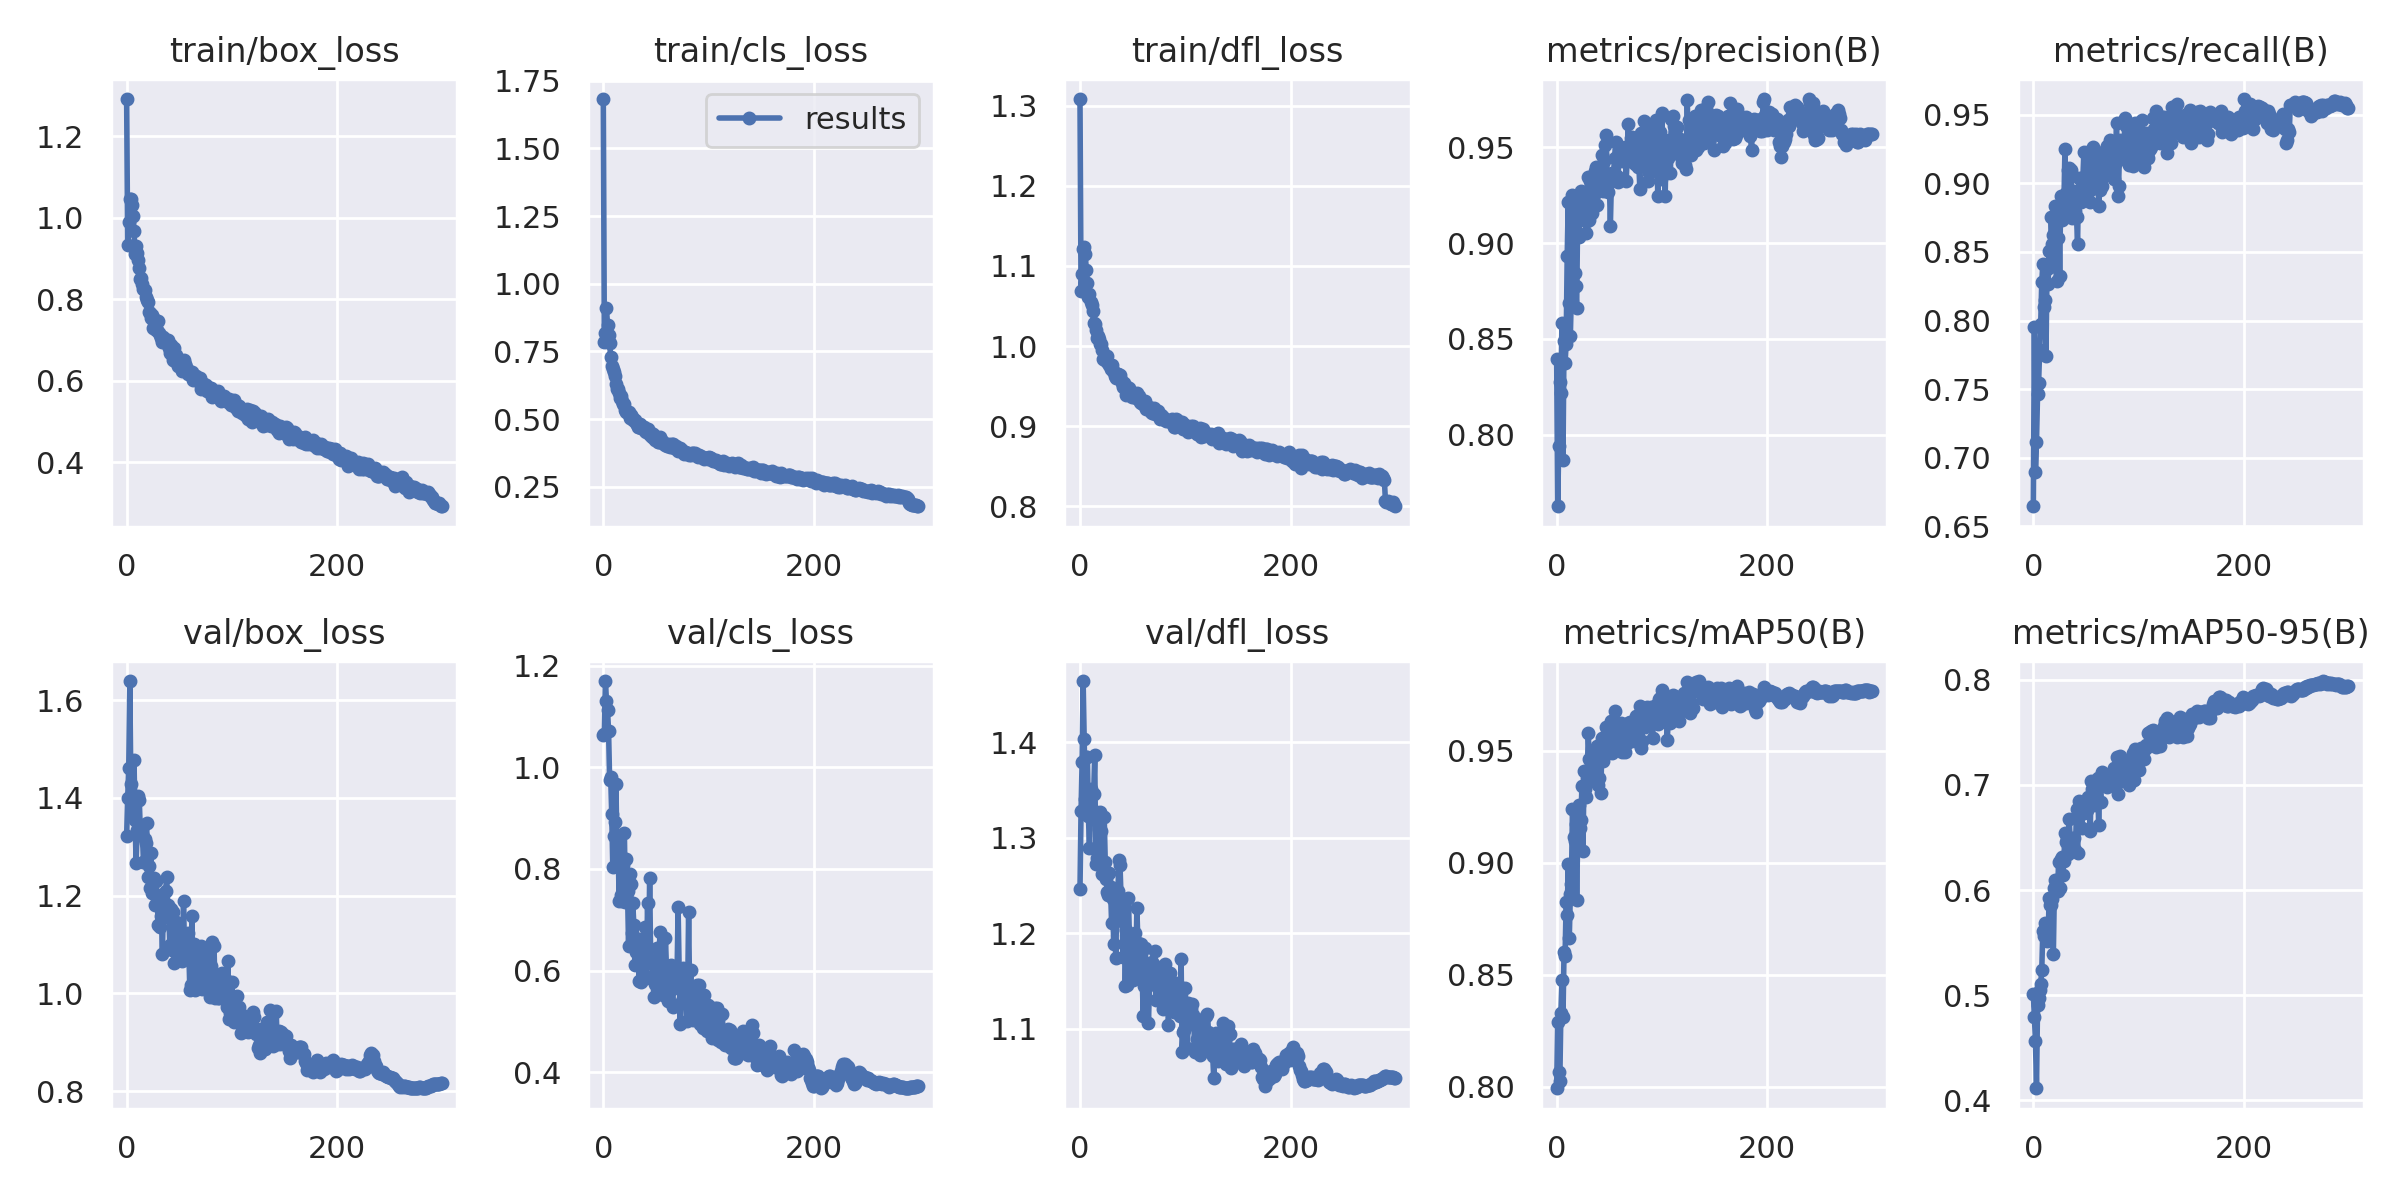

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/kaggle/working/datasets


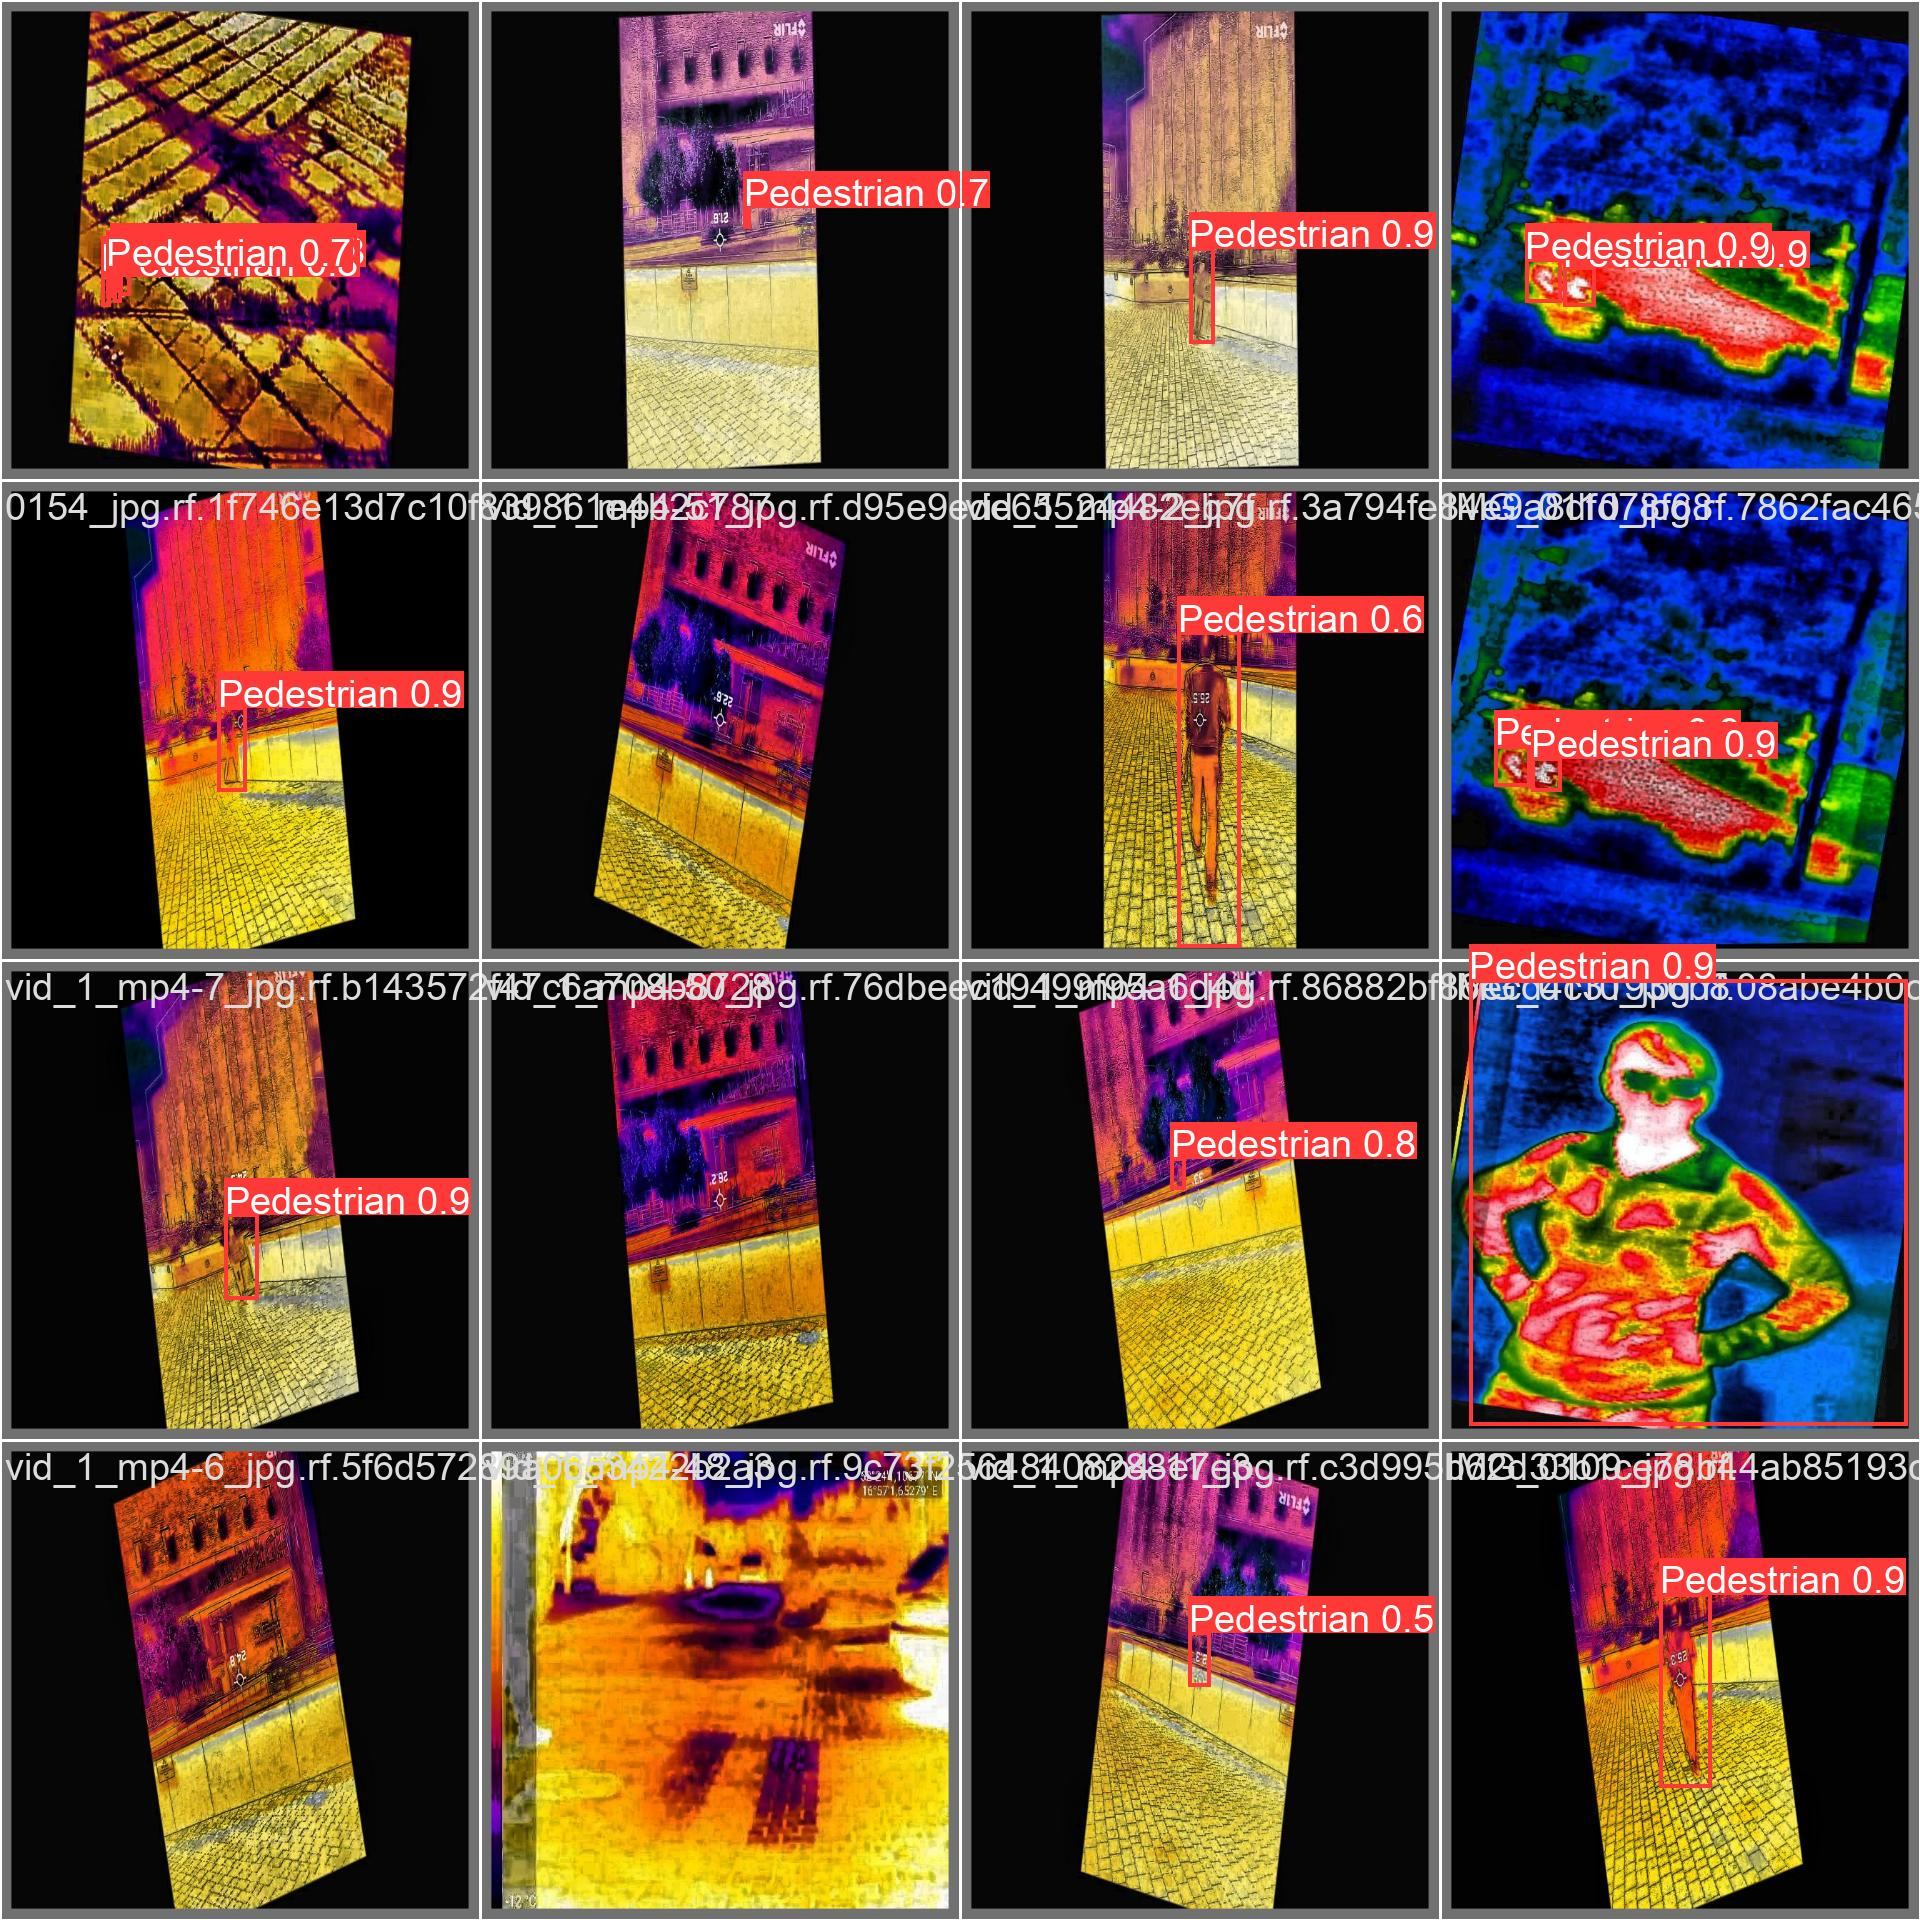

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [34]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working/datasets
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Pedestrians-Detection-1/valid/labels.cach
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        291        465      0.953      0.957      0.977      0.797
Speed: 1.0ms pre-process, 5.6ms inference, 0.0ms loss, 2.4ms post-process per image


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/predict/test1.jpeg', width=600)

## Inference with Custom Model

In [44]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/kaggle/working/datasets/Pedestrians-Detection-1/test/images save=True

/kaggle/working/datasets
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/141 /kaggle/working/datasets/Pedestrians-Detection-1/test/images/0155_jpg.rf.d99f125d782531437a38fad92a97afee.jpg: 640x640 5 Pedestrians, 7.8ms
image 2/141 /kaggle/working/datasets/Pedestrians-Detection-1/test/images/0197_jpg.rf.1987542ae339c5ca520f93bdd1b029f3.jpg: 640x640 5 Pedestrians, 7.7ms
image 3/141 /kaggle/working/datasets/Pedestrians-Detection-1/test/images/0207_jpg.rf.5d61b3ac3f0f29a533d31991bfc8d72c.jpg: 640x640 5 Pedestrians, 7.7ms
image 4/141 /kaggle/working/datasets/Pedestrians-Detection-1/test/images/0208_jpg.rf.50e200fcec

/kaggle/working/datasets


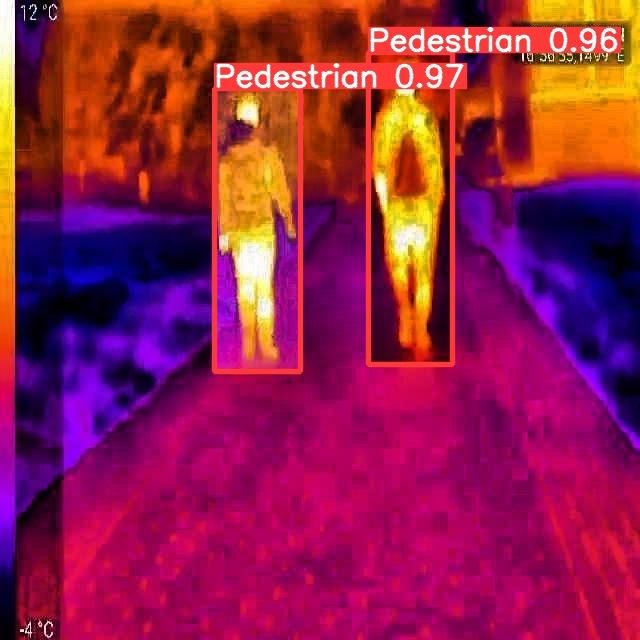

In [46]:
%cd {HOME}
Image(filename='/kaggle/working/datasets/runs/detect/predict2/video-1650742048_mp4-6_jpg.rf.f6c0bb03b3d763da98a97d571db2022c.jpg', width=600)